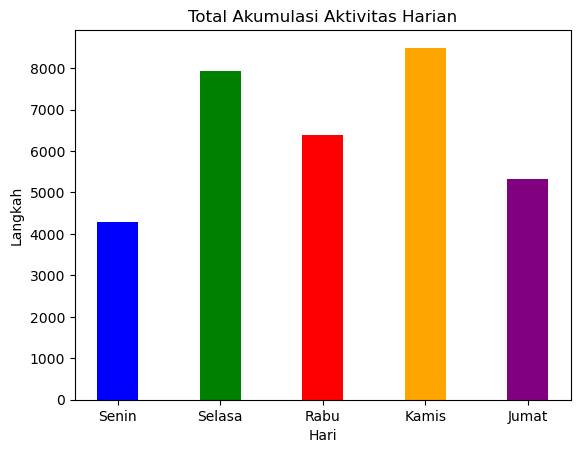



Rata rata Aktivitas: 6100.00
Rata rata Produktivitas: 75.00
Rata rata Kalori Terbakar: 300.00
Rata rata Jam Tidur: 6.40
Hari dengan Aktivitas Tertinggi: Kamis
Hari dengan Kalori Tertinggi: Kamis
Hari dengan Jam Tidur Tertinggi: Rabu
Hari dengan Produktivitas Tertinggi: Kamis
Korelasi antara Langkah dan Kalori Terbakar: 0.99 yang memiliki hubungan yang kuat antara keduanya
Prediksi Langkah: 8250
Prediksi Kalori Terbakar: 388
Prediksi Jam Tidur: 7
Prediksi Produktivitas: 86
     Hari Langkah Kalori Terbakar Jam Tidur Produktivitas (%) Total Aktivitas
0   Senin    4000             200         6                70            4276
1  Selasa    7500             350         7                80            7937
2    Rabu    6000             300         8                75            6383
3   Kamis    8000             400         6                85            8491
4   Jumat    5000             250         5                65            5320
0   Sabtu    8250             388         7          

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import LinearRegression

# Dataset Aktivitas Harian
data_aktivitas = {
    'Hari': ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat'],
    'Langkah': [4000, 7500, 6000, 8000, 5000],
    'Kalori Terbakar': [200, 350, 300, 400, 250],
    'Jam Tidur': [6, 7, 8, 6, 5],
    'Produktivitas (%)': [70, 80, 75, 85, 65]
}

df_aktivitas    = pd.DataFrame(data_aktivitas)
#Histori Aktivitas  Langkah
df_aktivitas["Total Aktivitas"] = df_aktivitas["Langkah"] +  df_aktivitas["Kalori Terbakar"] +  df_aktivitas["Jam Tidur"] + df_aktivitas["Produktivitas (%)"]

plt.bar(df_aktivitas['Hari'],df_aktivitas['Total Aktivitas'], color=['blue', 'green', 'red', 'orange', 'purple'], width=0.4)
plt.xlabel('Hari')
plt.ylabel('Langkah')
plt.title('Total Akumulasi Aktivitas Harian')
plt.show()

print("\n")

#Rata rata Aktivitas
langkah = df_aktivitas['Langkah'].mean()
print(f"Rata rata Aktivitas: {langkah:.2f}")

#Rata rata Produktivitas
produktivitas = df_aktivitas['Produktivitas (%)'].mean()
print(f"Rata rata Produktivitas: {produktivitas:.2f}")

#Rata rata Kalori Terbakar
kalori = df_aktivitas['Kalori Terbakar'].mean()
print(f"Rata rata Kalori Terbakar: {kalori:.2f}")

#Rata rata Jam Tidur
tidur = df_aktivitas['Jam Tidur'].mean()
print(f"Rata rata Jam Tidur: {tidur:.2f}")

# Hari dengan "Langkah" Aktivitas Tertinggi
langkah = df_aktivitas['Langkah'].idxmax()
hari_tertinggi = df_aktivitas.loc[langkah, 'Hari']
print(f"Hari dengan Aktivitas Tertinggi: {hari_tertinggi}")

# Hari dengan "Kalori Terbakar" Aktivitas Tertinggi
kalori = df_aktivitas['Kalori Terbakar'].idxmax()
kalori_tertinggi = df_aktivitas.loc[kalori, 'Hari']
print(f"Hari dengan Kalori Tertinggi: {kalori_tertinggi}")

# Hari dengan "Jam Tidur" Aktivitas Tertinggi
tidur = df_aktivitas['Jam Tidur'].idxmax()
tidur_tertinggi = df_aktivitas.loc[tidur, 'Hari']
print(f"Hari dengan Jam Tidur Tertinggi: {tidur_tertinggi}")

# Hari dengan "Produktivitas" Aktivitas Tertinggi
produktivitas = df_aktivitas['Produktivitas (%)'].idxmax()
produktivitas_tertinggi = df_aktivitas.loc[produktivitas, 'Hari']
print(f"Hari dengan Produktivitas Tertinggi: {produktivitas_tertinggi}")

#Korelasi antara  Langkah dan Kalori Terbakar
korelasi = stat.pearsonr(df_aktivitas['Langkah'], df_aktivitas['Kalori Terbakar'])
if korelasi[0] > 0:
    print(f"Korelasi antara Langkah dan Kalori Terbakar: {korelasi[0]:.2f} yang memiliki hubungan yang kuat antara keduanya")
else:
    print(f"Korelasi antara Langkah dan Kalori Terbakar: {korelasi[0]:.2f} yang memiliki hubungan yang lemah antara keduanya")


#Prediksi Menggunakan Regresi Linear
# Model 1: Prediksi Langkah
x_langkah  = df_aktivitas[['Kalori Terbakar', 'Jam Tidur', 'Produktivitas (%)']]
y_langkah = df_aktivitas['Langkah']
model_langkah = LinearRegression()
model_langkah.fit(x_langkah, y_langkah)

# Model 2: Prediksi Kalori Terbakar
x_kalori = df_aktivitas[['Langkah', 'Jam Tidur', 'Produktivitas (%)']]
y_kalori = df_aktivitas['Kalori Terbakar']
model_kalori = LinearRegression()
model_kalori.fit(x_kalori, y_kalori)

# Model 3: Prediksi Jam Tidur
x_tidur = df_aktivitas[['Langkah', 'Kalori Terbakar', 'Produktivitas (%)']]
y_tidur = df_aktivitas['Jam Tidur']
model_tidur = LinearRegression()
model_tidur.fit(x_tidur, y_tidur)

# Model 4: Prediksi Produktivitas
x_produktivitas = df_aktivitas[['Langkah', 'Kalori Terbakar', 'Jam Tidur']]
y_produktivitas = df_aktivitas['Produktivitas (%)']
model_produktivitas = LinearRegression()
model_produktivitas.fit(x_produktivitas, y_produktivitas)

#Data Baru
data_baru_langkah = pd.DataFrame(
    [[
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Jam Tidur'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Kalori Terbakar', 'Jam Tidur', 'Produktivitas (%)']
)

data_baru_kalori = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Jam Tidur'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Langkah', 'Jam Tidur', 'Produktivitas (%)']
)

data_baru_Jam = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Langkah', 'Kalori Terbakar', 'Produktivitas (%)']
)

data_baru_produktivitas = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Jam Tidur'].max()
    ]],
    columns=['Langkah', 'Kalori Terbakar', 'Jam Tidur']
)

#Prediksi Data Baru
prediksi_langkah = model_langkah.predict(data_baru_langkah)
prediksi_kalori = model_kalori.predict(data_baru_kalori)
prediksi_tidur = model_tidur.predict(data_baru_Jam)
prediksi_produktivitas = model_produktivitas.predict(data_baru_produktivitas)


#Tambah Prediction
total_aktivitas_prediksi = prediksi_langkah + prediksi_kalori + prediksi_tidur + prediksi_produktivitas
predisi_sabtu = pd.DataFrame({
     'Hari': ['Sabtu'],
    'Langkah': [f"{prediksi_langkah[0]:.0f}"],
    'Kalori Terbakar': [f"{prediksi_kalori[0]:.0f}"],
    'Jam Tidur': [f"{prediksi_tidur[0]:.0f}"],
    'Produktivitas (%)': [f"{prediksi_produktivitas[0]:.0f}"],
    'Total Aktivitas': [f"{total_aktivitas_prediksi[0]:.0f}"]
})

df_new =  pd.concat([df_aktivitas, predisi_sabtu])
print(f"Prediksi Langkah: {prediksi_langkah[0]:.0f}")
print(f"Prediksi Kalori Terbakar: {prediksi_kalori[0]:.0f}")
print(f"Prediksi Jam Tidur: {prediksi_tidur[0]:.0f}")
print(f"Prediksi Produktivitas: {prediksi_produktivitas[0]:.0f}")

print(df_new)

     Hari  Langkah  Kalori Terbakar  Jam Tidur  Produktivitas (%)  \
0   Senin      100              200          3                  4   
1  Selasa       12               12         12                 12   
2    Rabu      121               12         12                 12   
3   Kamis       12              121         21                 12   
4   Jumat       12               12         12                 12   

   Total Aktivitas  
0              307  
1               48  
2              157  
3              166  
4               48  
     Hari  Langkah  Kalori Terbakar  Jam Tidur  Produktivitas (%)  \
0   Senin      100              200          3                  4   
1  Selasa       12               12         12                 12   
2    Rabu      121               12         12                 12   
3   Kamis       12              121         21                 12   
4   Jumat       12               12         12                 12   
5   Sabtu       13              121         2

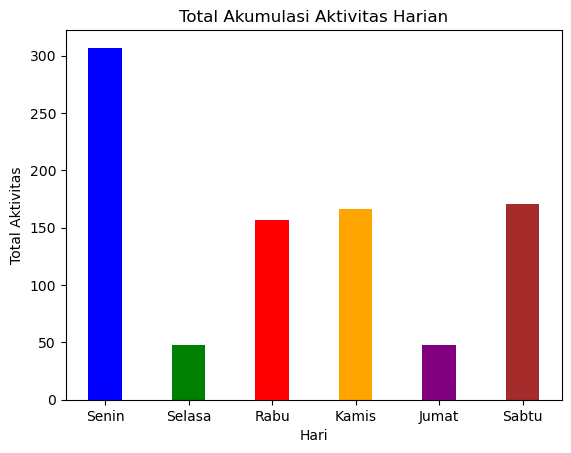

Korelasi antara Langkah dan Kalori Terbakar: 0.26 (hubungan kuat)
Korelasi antara Jam Tidur dan Produktivitas: 0.79 (hubungan kuat)


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import LinearRegression

# Dataset Aktivitas Harian
# Membuat daftar untuk menyimpan data
hari = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat']
langkah = []
kalori = []
jam_tidur = []
produktivitas = []

# Memasukan data untuk disimpan datanya
for i in range(len(hari)):
    langkah.append(int(input(f"Langkah hari {hari[i]}: ")))
    kalori.append(int(input(f"Kalori Terbakar {hari[i]}: ")))
    jam_tidur.append(int(input(f"Jam Tidur {hari[i]}: ")))
    produktivitas.append(int(input(f"Produktivitas {hari[i]} (%): ")))

# Membuat DataFrame
data_aktivitas = {
    'Hari': hari,
    'Langkah': langkah,
    'Kalori Terbakar': kalori,
    'Jam Tidur': jam_tidur,
    'Produktivitas (%)': produktivitas
}
df_aktivitas = pd.DataFrame(data_aktivitas)

# Menambahkan kolom Total Aktivitas
df_aktivitas['Total Aktivitas'] = (
    df_aktivitas['Langkah'] +
    df_aktivitas['Kalori Terbakar'] +
    df_aktivitas['Jam Tidur'] +
    df_aktivitas['Produktivitas (%)']
)

print(df_aktivitas)

# Prediksi Menggunakan Regresi Linear
# Model 1: Prediksi Langkah
x_langkah = df_aktivitas[['Kalori Terbakar', 'Jam Tidur', 'Produktivitas (%)']]
y_langkah = df_aktivitas['Langkah']
model_langkah = LinearRegression()
model_langkah.fit(x_langkah, y_langkah)

# Model 2: Prediksi Kalori Terbakar
x_kalori = df_aktivitas[['Langkah', 'Jam Tidur', 'Produktivitas (%)']]
y_kalori = df_aktivitas['Kalori Terbakar']
model_kalori = LinearRegression()
model_kalori.fit(x_kalori, y_kalori)

# Model 3: Prediksi Jam Tidur
x_tidur = df_aktivitas[['Langkah', 'Kalori Terbakar', 'Produktivitas (%)']]
y_tidur = df_aktivitas['Jam Tidur']
model_tidur = LinearRegression()
model_tidur.fit(x_tidur, y_tidur)

# Model 4: Prediksi Produktivitas
x_produktivitas = df_aktivitas[['Langkah', 'Kalori Terbakar', 'Jam Tidur']]
y_produktivitas = df_aktivitas['Produktivitas (%)']
model_produktivitas = LinearRegression()
model_produktivitas.fit(x_produktivitas, y_produktivitas)

# Data Baru
data_baru_langkah = pd.DataFrame(
    [[
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Jam Tidur'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Kalori Terbakar', 'Jam Tidur', 'Produktivitas (%)']
)

data_baru_kalori = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Jam Tidur'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Langkah', 'Jam Tidur', 'Produktivitas (%)']
)

data_baru_Jam = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Produktivitas (%)'].max()
    ]],
    columns=['Langkah', 'Kalori Terbakar', 'Produktivitas (%)']
)

data_baru_Produktivitas = pd.DataFrame(
    [[
        df_aktivitas['Langkah'].max(),
        df_aktivitas['Kalori Terbakar'].max(),
        df_aktivitas['Jam Tidur'].max()
    ]],
    columns=['Langkah', 'Kalori Terbakar', 'Jam Tidur']
)

# Prediksi Data Baru
prediksi_langkah = model_langkah.predict(data_baru_langkah)
prediksi_kalori = model_kalori.predict(data_baru_kalori)
prediksi_tidur = model_tidur.predict(data_baru_Jam)
prediksi_produktivitas = model_produktivitas.predict(data_baru_Produktivitas)

total_aktivitas_prediksi = (
    prediksi_langkah[0] + prediksi_kalori[0] +
    prediksi_tidur[0] + prediksi_produktivitas[0]
)

predisi_sabtu = pd.DataFrame({
    'Hari': ['Sabtu'],
    'Langkah': [int(prediksi_langkah[0])],
    'Kalori Terbakar': [int(prediksi_kalori[0])],
    'Jam Tidur': [int(prediksi_tidur[0])],
    'Produktivitas (%)': [int(prediksi_produktivitas[0])],
    'Total Aktivitas': [int(total_aktivitas_prediksi)]
})

df_new = pd.concat([df_aktivitas, predisi_sabtu], ignore_index=True)
print(df_new)

# Visualisasi Prediksi menggunakan Histogram
plt.bar(df_new['Hari'], df_new['Total Aktivitas'], color=['blue', 'green', 'red', 'orange', 'purple', 'brown'], width=0.4)
plt.xlabel('Hari')
plt.ylabel('Total Aktivitas')
plt.title('Total Akumulasi Aktivitas Harian')
plt.show()

# Korelasi antara Langkah dan Kalori Terbakar
korelasi = stat.pearsonr(df_aktivitas['Langkah'], df_aktivitas['Kalori Terbakar'])
if korelasi[0] > 0:
    print(f"Korelasi antara Langkah dan Kalori Terbakar: {korelasi[0]:.2f} (hubungan kuat)")
else:
    print(f"Korelasi antara Langkah dan Kalori Terbakar: {korelasi[0]:.2f} (hubungan lemah)")

korelasi2 = stat.pearsonr(df_aktivitas['Jam Tidur'], df_aktivitas['Produktivitas (%)'])
if korelasi2[0] > 0:
    print(f"Korelasi antara Jam Tidur dan Produktivitas: {korelasi2[0]:.2f} (hubungan kuat)")
else:
    print(f"Korelasi antara Jam Tidur dan Produktivitas: {korelasi2[0]:.2f} (hubungan lemah)")
